**Data Preprocessing**

In [ ]:
from google.colab import files
import pandas as pd

# Upload your dataset file
uploaded = files.upload()

# Read the dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

df.head()

Saving marine species.csv to marine species.csv


,Unnamed: 0,Order,Family,Species,Common name,Habitat,Feeding strategy,Trophic level,IUCN,Fisheries interest,...,Plastic type,Polymers,"Plastic size (mm) < 1, 1-5, > 5",Life stage,Length (cm),Location,Region,Reference,Purpose of the study,Comments
0,1,Osteichthyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Anguilliformes,Anguillidae,Anguilla anguilla,European eel,"N, D",S,3.6,CR,Y,...,fragment,PA-PP,<1,larva,NaN,Atlantic North - English Channel,ATL N,"Steer et al., 2017",NaN,NaN
2,3,NaN,Congridae,Conger conger,European conger,"N-O, D",BP,4.3,NE,Y,...,NaN,NaN,NaN,NaN,27,Atlantic North - Spain,ATL N,"Lopez-Lopez et al., 2018",NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Mediterranean - Eastern Ionian Sea,MED,"Anastasopoulou et al., 2013",NaN,NaN
4,5,NaN,NaN,Conger verreauxi,Conger,"N, D",BP,4.2,LC,Y,...,NaN,NaN,NaN,NaN,NaN,Pacific South - Australia,PAC S,"Cannon et al., 2016",NaN,NaN


In [ ]:
# Drop the specified columns from the dataset
columns_to_drop = ['Unnamed: 0','G/GI', 'Method', 'Method 1,2,3', 'Fisheries interest', 'Life stage', 'Reference', 'Comments', 'Purpose of the study']
df = df.drop(columns=columns_to_drop, errors='ignore')

df.head()

,Order,Family,Species,Common name,Habitat,Feeding strategy,Trophic level,IUCN,N,N of fish ingested,FO (%),PL (N/fish),Plastic type,Polymers,"Plastic size (mm) < 1, 1-5, > 5",Length (cm),Location,Region
0,Osteichthyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Anguilliformes,Anguillidae,Anguilla anguilla,European eel,"N, D",S,3.6,CR,NaN,NaN,yes,NaN,fragment,PA-PP,<1,NaN,Atlantic North - English Channel,ATL N
2,NaN,Congridae,Conger conger,European conger,"N-O, D",BP,4.3,NE,7007.0,1.0,0.0142714428428714,NaN,NaN,NaN,NaN,27,Atlantic North - Spain,ATL N
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,0.0,0,NaN,NaN,NaN,NaN,NaN,Mediterranean - Eastern Ionian Sea,MED
4,NaN,NaN,Conger verreauxi,Conger,"N, D",BP,4.2,LC,25.0,0.0,0,NaN,NaN,NaN,NaN,NaN,Pacific South - Australia,PAC S


In [ ]:
df.columns

Index(['Order', 'Family', 'Species', 'Common name', 'Habitat',
       'Feeding strategy', 'Trophic level', 'IUCN', 'N', 'N of fish ingested',
       'FO (%) ', 'PL (N/fish)', 'Plastic type', 'Polymers',
       'Plastic size (mm)         < 1, 1-5, > 5', 'Length (cm)', 'Location',
       'Region'],
      dtype='object')

In [ ]:
df.describe()

,N,N of fish ingested
count,669.000000,571.000000
mean,243.439462,10.138354
std,1408.957113,34.029195
min,1.000000,0.000000
25%,4.000000,0.000000
50%,16.000000,1.000000
75%,56.000000,8.000000
max,25914.000000,506.000000


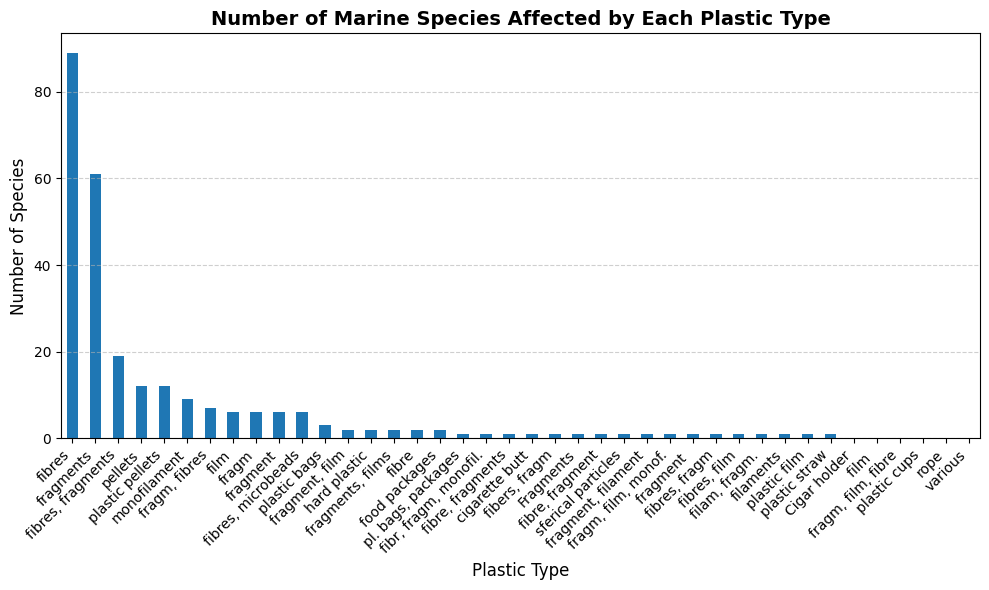

In [ ]:
# Count the number of species affected by each plastic type
import matplotlib.pyplot as plt
plastic_type_distribution = df.groupby('Plastic type')['Species'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plastic_type_distribution.plot(kind='bar')

# Chart labels and title
plt.title('Number of Marine Species Affected by Each Plastic Type', fontsize=14, fontweight='bold')
plt.xlabel('Plastic Type', fontsize=12)
plt.ylabel('Number of Species', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the chart
plt.tight_layout()
plt.show()


In [ ]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_ratio = (missing / len(df)) * 100
pd.DataFrame({'Missing Values': missing, 'Missing %': missing_ratio})


,Missing Values,Missing %
Order,653,94.775036
Family,552,80.116110
Polymers,548,79.535559
"Plastic size (mm) < 1, 1-5, > 5",426,61.828737
PL (N/fish),398,57.764877
Plastic type,346,50.217707
Length (cm),323,46.879536
Common name,223,32.365747
Feeding strategy,205,29.753266
Trophic level,201,29.172714


In [ ]:
# Clean and convert numeric-like text columns
for col in ['FO (%) ', 'Length (cm)', 'PL (N/fish)']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('[^0-9.]', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df['PL (N/fish)'] = df['PL (N/fish)'].fillna(df['PL (N/fish)'].median())

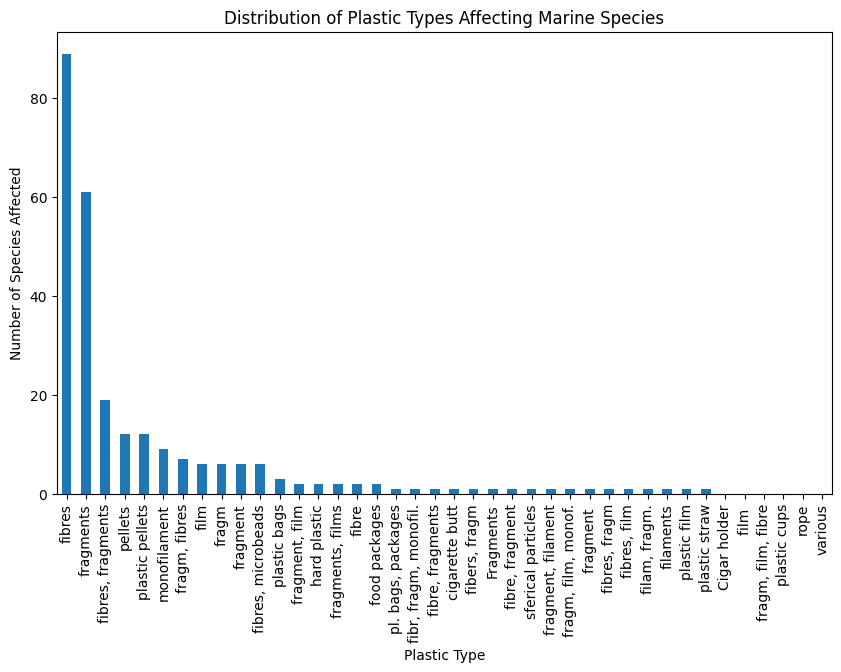

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of plastic types affecting species
plastic_type_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Plastic Types Affecting Marine Species')
plt.xlabel('Plastic Type')
plt.ylabel('Number of Species Affected')
plt.xticks(rotation=90)
plt.show()


In [ ]:
#Identify numeric vs categorical
import numpy as np
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]
print("Numeric cols:", num_cols)
print("Categorical cols:", cat_cols)


Numeric cols: ['N', 'N of fish ingested', 'FO (%) ', 'PL (N/fish)', 'Length (cm)']
Categorical cols: ['Order', 'Family', 'Species', 'Common name', 'Habitat', 'Feeding strategy', 'Trophic level', 'IUCN', 'Plastic type', 'Polymers', 'Plastic size (mm)         < 1, 1-5, > 5', 'Location', 'Region']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Corrected column name 'FO (%) '
categorical_columns = ['Order', 'Family', 'Species', 'Common name', 'FO (%) ', 'Polymers', 'Plastic size (mm)         < 1, 1-5, > 5', 'Plastic type', 'Feeding strategy', 'Habitat', 'Trophic level', 'IUCN', 'Location', 'Region']  # Add any other categorical columns if needed

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column].astype(str))

print("Label Encoded Dataset:")
print(df.head())

Label Encoded Dataset:
   Order  Family  Species  Common name  Habitat  Feeding strategy  \
0     24     137      496          463       16                 9   
1      0       6       21          174        3                 8   
2     36      28      104          173       10                 1   
3     36     137      496          463       16                 9   
4     36     137      105          141        3                 1   

   Trophic level  IUCN       N  N of fish ingested  FO (%)   PL (N/fish)  \
0             28     9     NaN                 NaN      215          1.7   
1             16     0     NaN                 NaN      215          1.7   
2             23     5  7007.0                 1.0        1          1.7   
3             28     9    44.0                 0.0        0          1.7   
4             22     3    25.0                 0.0        0          1.7   

   Plastic type  Polymers  Plastic size (mm)         < 1, 1-5, > 5  \
0            30        31          

In [ ]:
df.head()


,Order,Family,Species,Common name,Habitat,Feeding strategy,Trophic level,IUCN,N,N of fish ingested,FO (%),PL (N/fish),Plastic type,Polymers,"Plastic size (mm) < 1, 1-5, > 5",Length (cm),Location,Region,cluster,FO_category
0,24,137,496,463,16,9,28,9,NaN,NaN,215,1.7,30,31,4,NaN,64,6,NaN,NaN
1,0,6,21,174,3,8,16,0,NaN,NaN,215,1.7,22,8,2,NaN,4,0,NaN,NaN
2,36,28,104,173,10,1,23,5,7007.0,1.0,1,1.7,30,31,4,27.0,16,0,0.0,Low
3,36,137,496,463,16,9,28,9,44.0,0.0,0,1.7,30,31,4,NaN,39,3,NaN,Low
4,36,137,105,141,3,1,22,3,25.0,0.0,0,1.7,30,31,4,NaN,54,5,NaN,Low


**Exploratory Data Analysis (EDA)**

In [ ]:
# STEP 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visuals
plt.style.use("ggplot")
sns.set_theme(context="notebook", style="whitegrid")


print("Shape:", df.shape)
df.head()


Shape: (689, 18)


,Order,Family,Species,Common name,Habitat,Feeding strategy,Trophic level,IUCN,N,N of fish ingested,FO (%),PL (N/fish),Plastic type,Polymers,"Plastic size (mm) < 1, 1-5, > 5",Length (cm),Location,Region
0,Osteichthyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7,NaN,NaN,NaN,NaN,NaN,NaN
1,Anguilliformes,Anguillidae,Anguilla anguilla,European eel,"N, D",S,3.6,CR,NaN,NaN,NaN,1.7,fragment,PA-PP,<1,NaN,Atlantic North - English Channel,ATL N
2,NaN,Congridae,Conger conger,European conger,"N-O, D",BP,4.3,NE,7007.0,1.0,0.014271,1.7,NaN,NaN,NaN,27.0,Atlantic North - Spain,ATL N
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,0.0,0.000000,1.7,NaN,NaN,NaN,NaN,Mediterranean - Eastern Ionian Sea,MED
4,NaN,NaN,Conger verreauxi,Conger,"N, D",BP,4.2,LC,25.0,0.0,0.000000,1.7,NaN,NaN,NaN,NaN,Pacific South - Australia,PAC S


In [ ]:
# STEP 4: Separate data types
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include="object").columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)


Numeric columns: ['N', 'N of fish ingested', 'FO (%) ', 'PL (N/fish)', 'Length (cm)']
Categorical columns: ['Order', 'Family', 'Species', 'Common name', 'Habitat', 'Feeding strategy', 'Trophic level', 'IUCN', 'Plastic type', 'Polymers', 'Plastic size (mm)         < 1, 1-5, > 5', 'Location', 'Region']


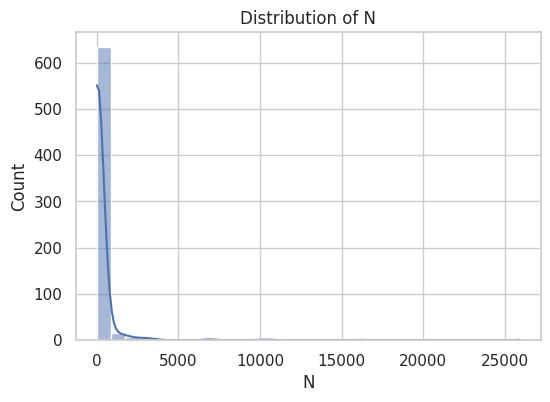

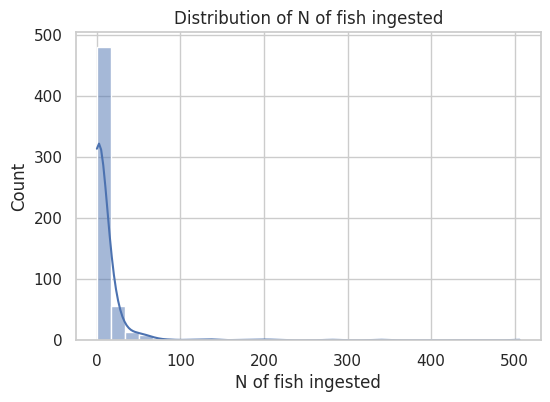

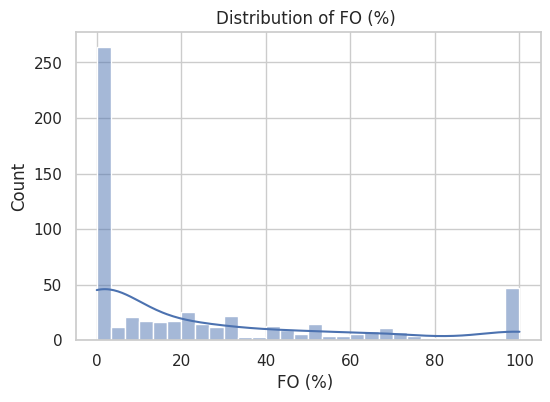

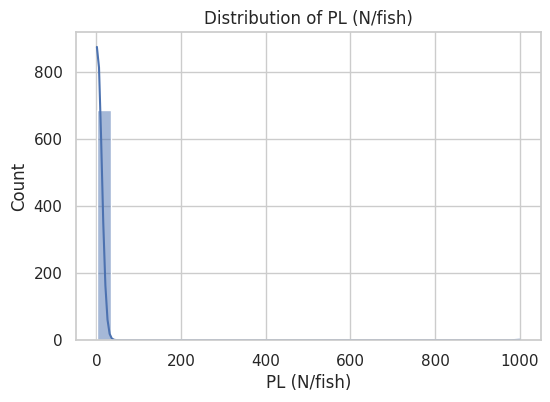

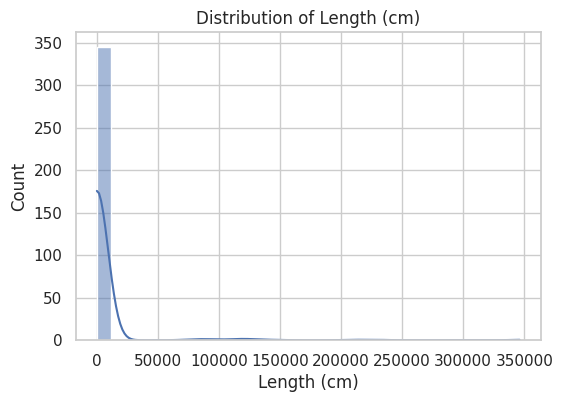

In [ ]:
#Distribution plots for numeric columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


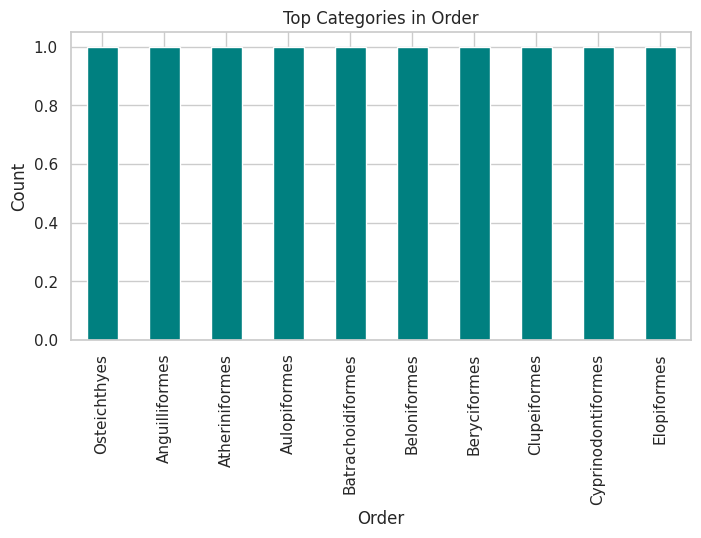

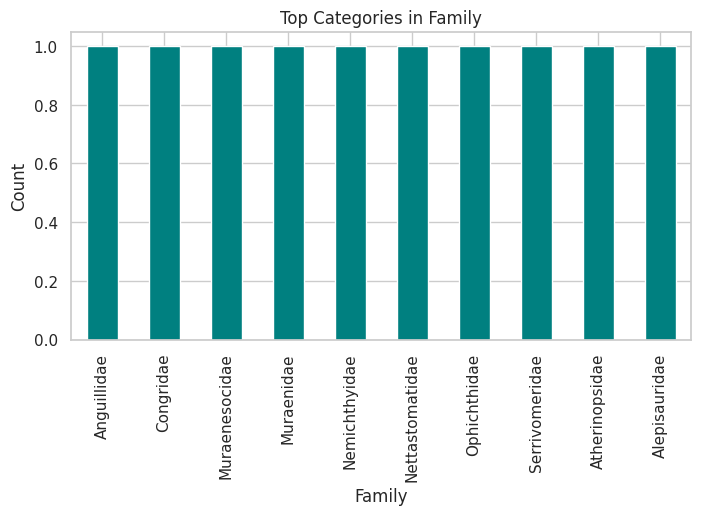

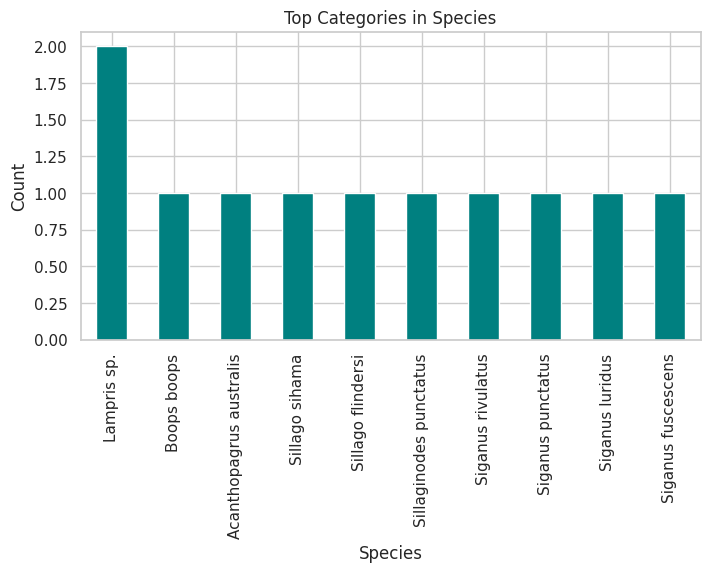

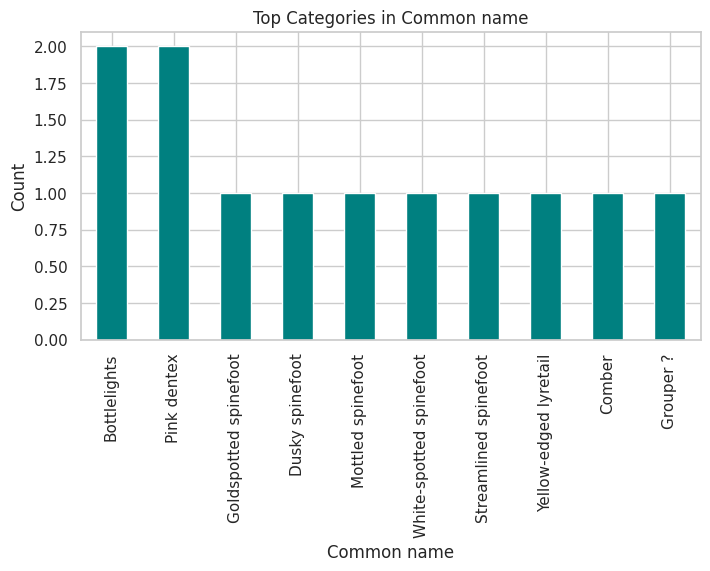

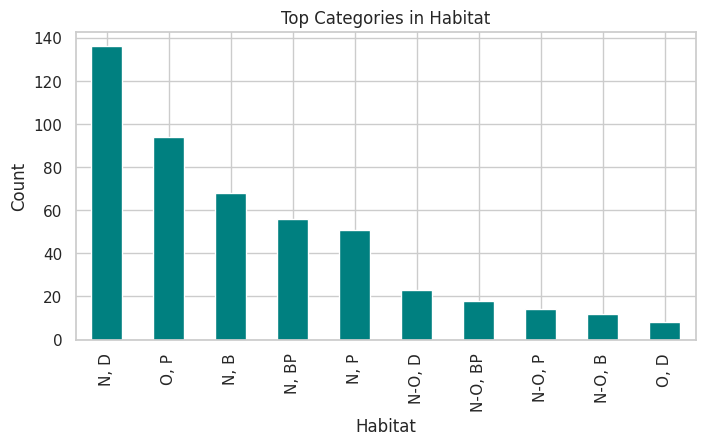

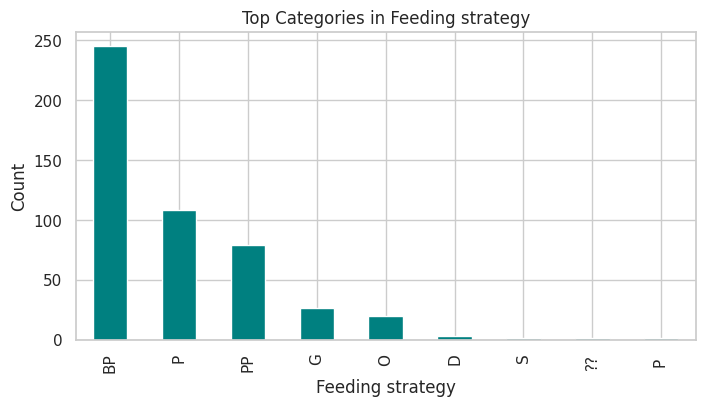

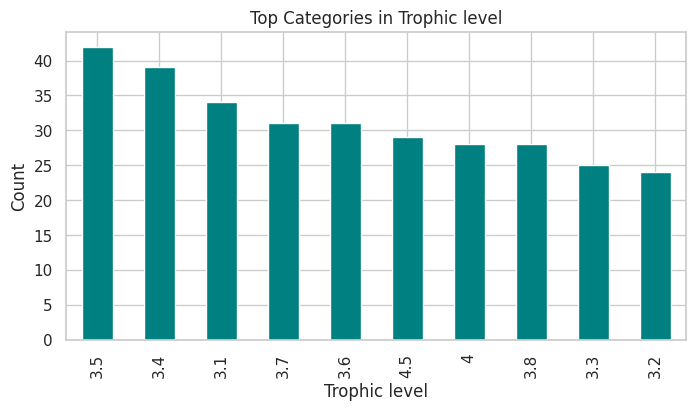

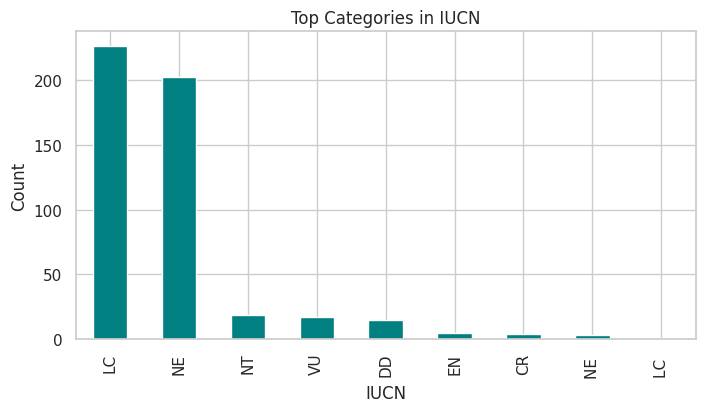

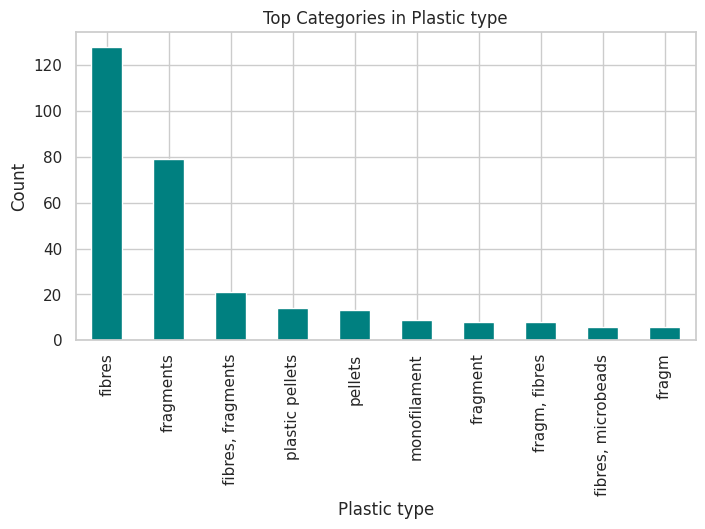

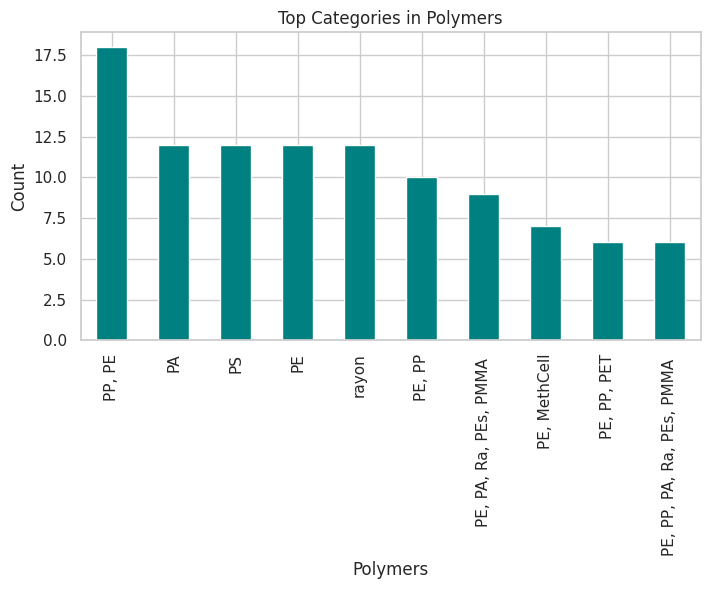

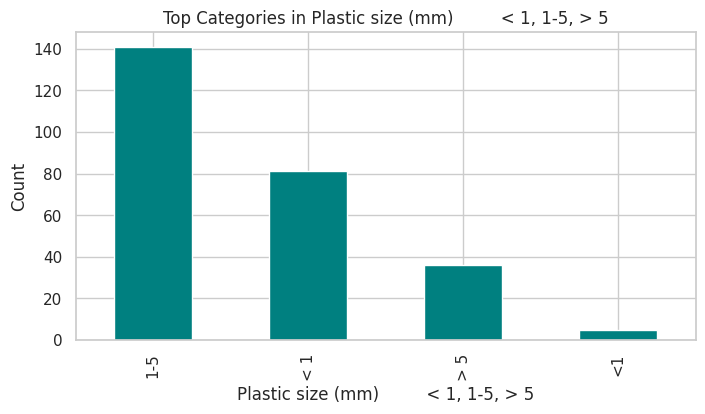

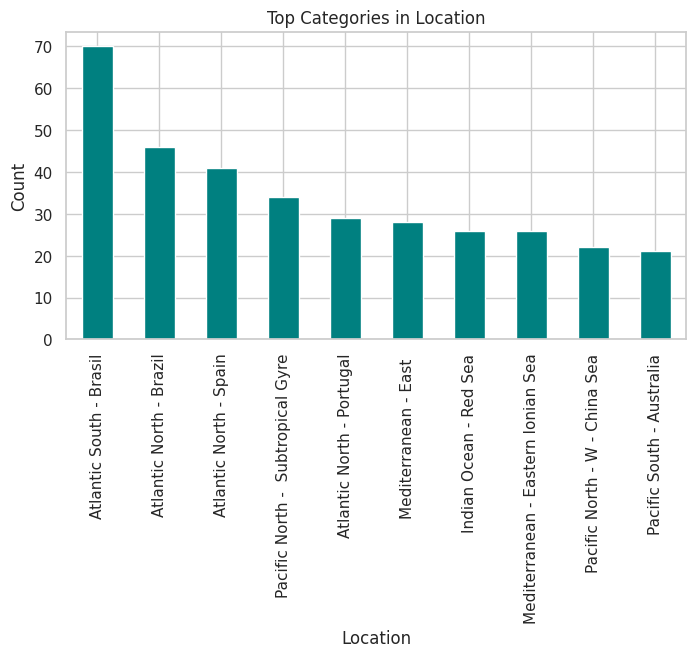

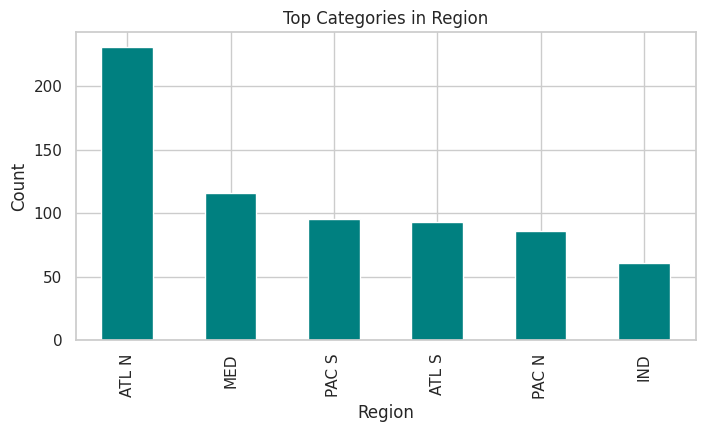

In [ ]:
#Bar plots for categorical features
for col in cat_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind='bar', color='teal')
    plt.title(f"Top Categories in {col}")
    plt.ylabel("Count")
    plt.show()


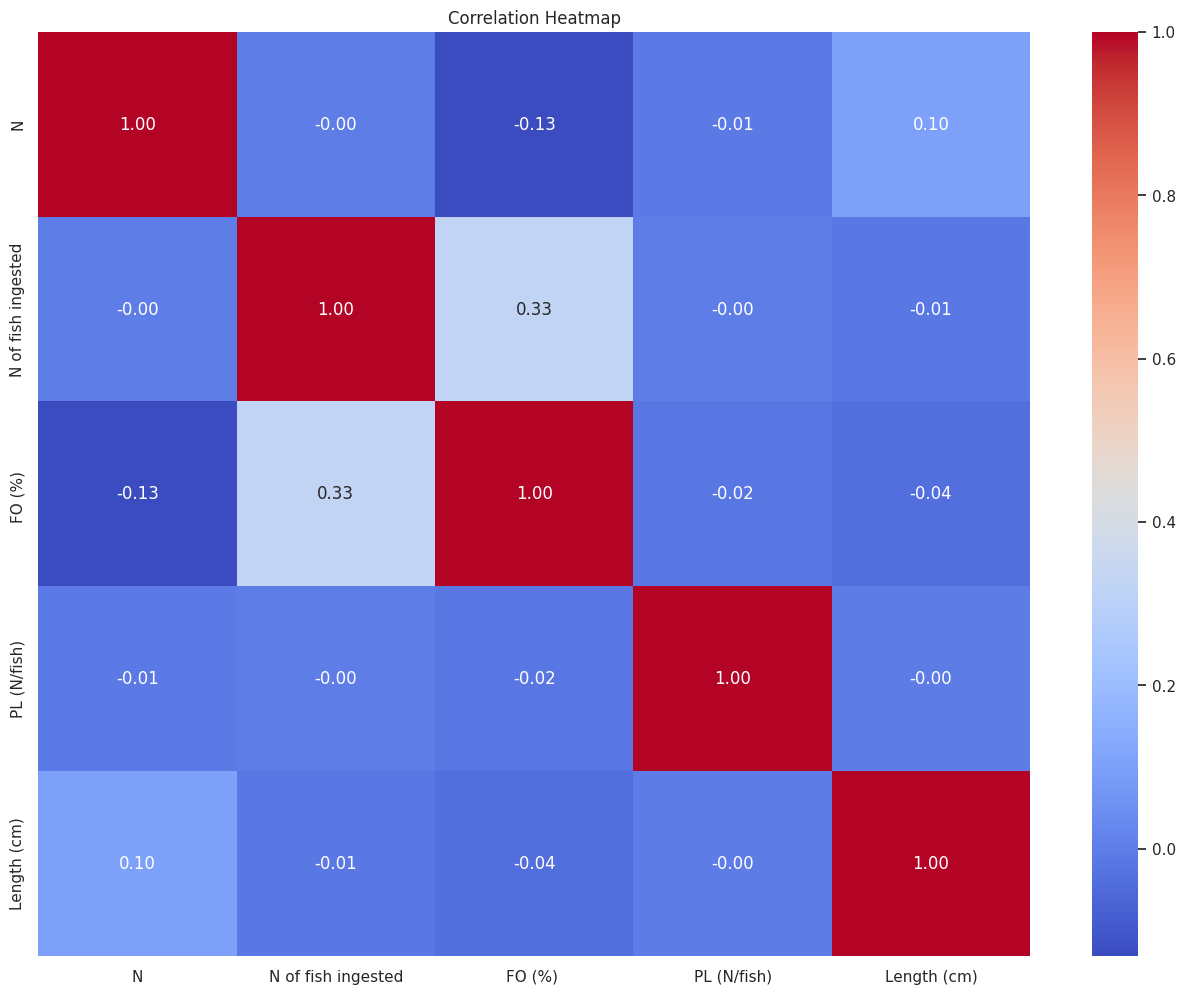

FO (%)              N of fish ingested    0.327383
N of fish ingested  FO (%)                0.327383
N                   Length (cm)           0.100988
Length (cm)         N                     0.100988
N                   N of fish ingested   -0.002257
dtype: float64


In [ ]:
#Correlation heatmap
plt.figure(figsize=(16,12))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Top correlated pairs
print(corr.unstack().sort_values(ascending=False)[len(num_cols):10])


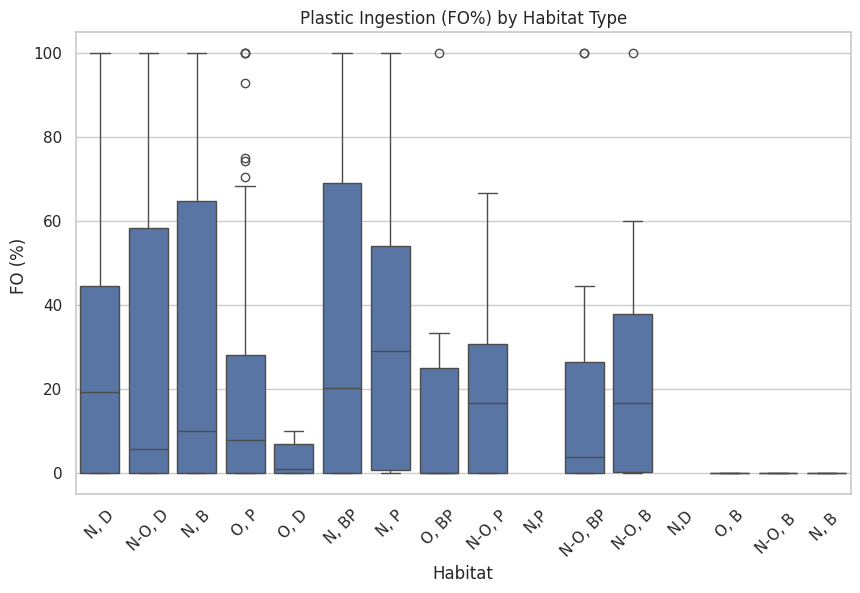

In [ ]:
#Compare numeric metrics across categories (example: FO% vs Habitat)
if "FO (%) " in df.columns and "Habitat" in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x="Habitat", y="FO (%) ", data=df)
    plt.title("Plastic Ingestion (FO%) by Habitat Type")
    plt.xticks(rotation=45)
    plt.show()


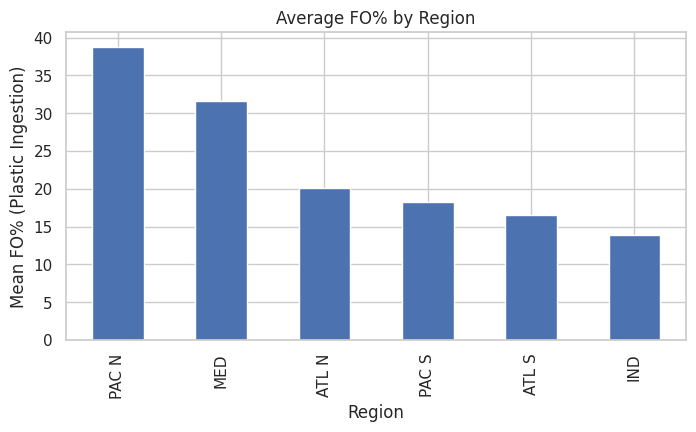

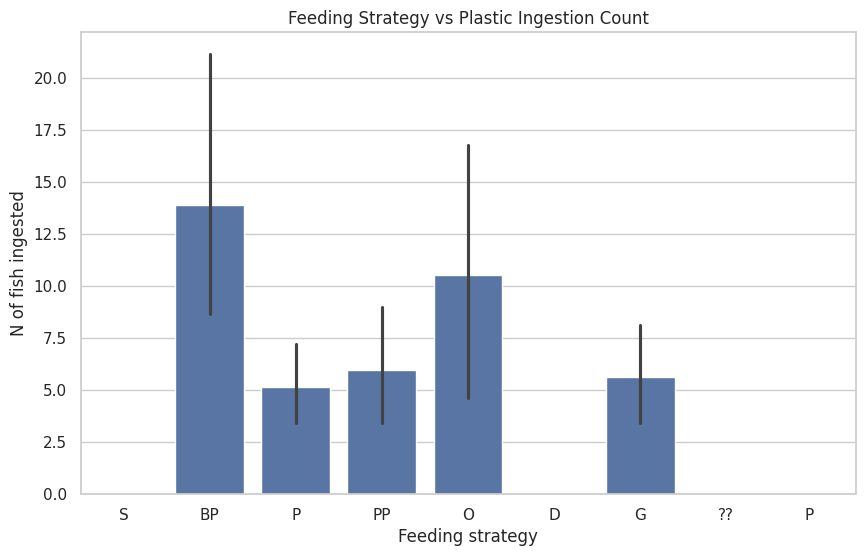

In [ ]:
# average plastic ingestion rate by region and habitat
if "Region" in df.columns and "FO (%) " in df.columns:
    region_habitat = df.groupby("Region")["FO (%) "].mean().sort_values(ascending=False)
    region_habitat.plot(kind='bar' ,figsize=(8,4))
    plt.title("Average FO% by Region")
    plt.ylabel("Mean FO% (Plastic Ingestion)")
    plt.show()

if "Feeding strategy" in df.columns and "N of fish ingested" in df.columns:
    plt.figure(figsize=(10,6))
    sns.barplot(x="Feeding strategy", y="N of fish ingested", data=df)
    plt.title("Feeding Strategy vs Plastic Ingestion Count")
    plt.show()


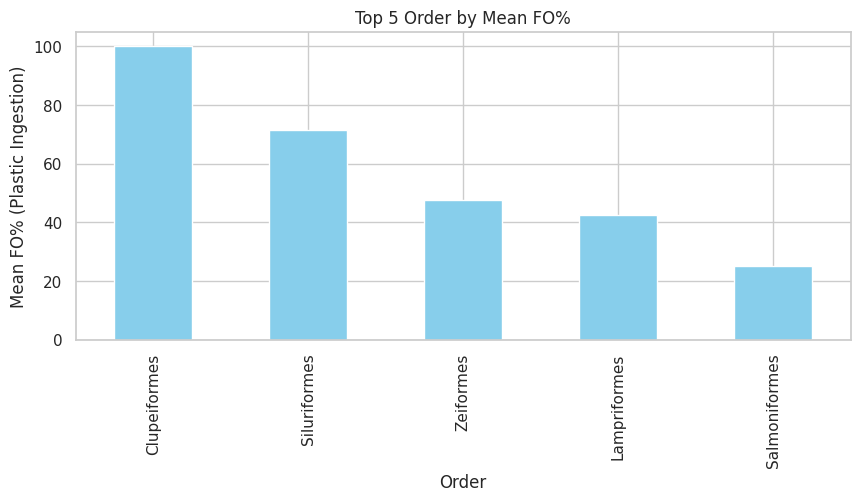

In [ ]:
df.groupby("Order")["FO (%) "].mean().sort_values(ascending=False).head(5).plot(
    kind="bar", figsize=(10,4), color="skyblue", title="Top 5 Order by Mean FO%"
)
plt.ylabel("Mean FO% (Plastic Ingestion)")
plt.show()


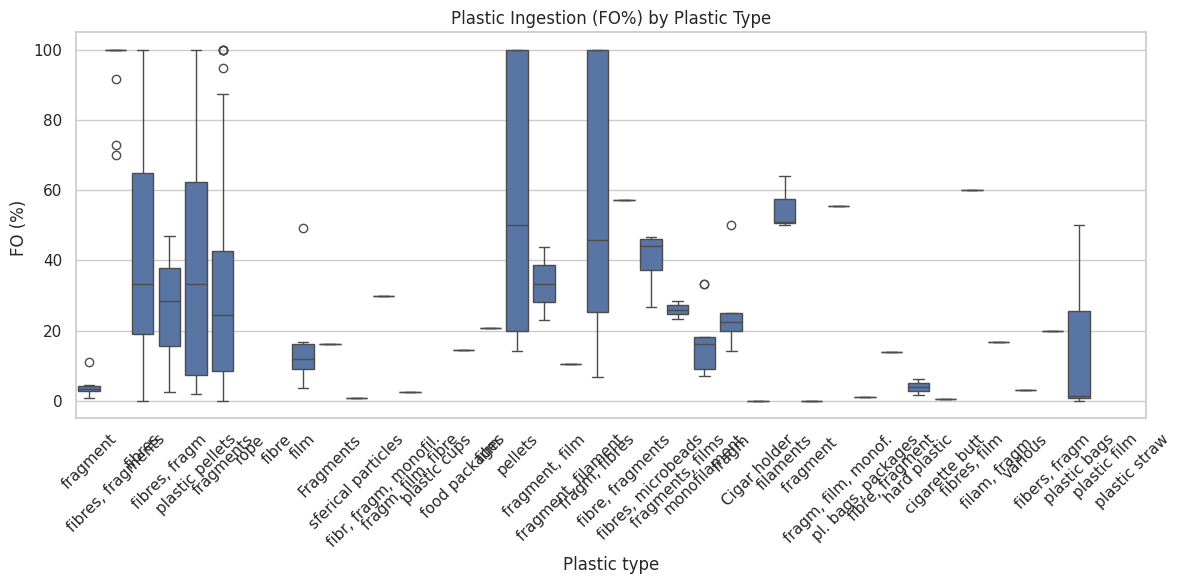

In [ ]:
plt.figure(figsize=(12, 6))  # Increase figure size
sns.boxplot(x="Plastic type", y="FO (%) ", data=df)
plt.xticks(rotation=45)
plt.title("Plastic Ingestion (FO%) by Plastic Type")
plt.tight_layout()
plt.show()


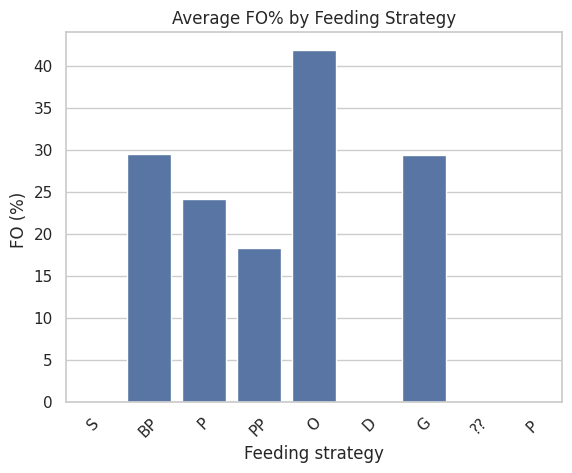

In [ ]:
sns.barplot(x="Feeding strategy", y="FO (%) ", data=df, errorbar=None)
plt.xticks(rotation=45)
plt.title("Average FO% by Feeding Strategy")
plt.show()

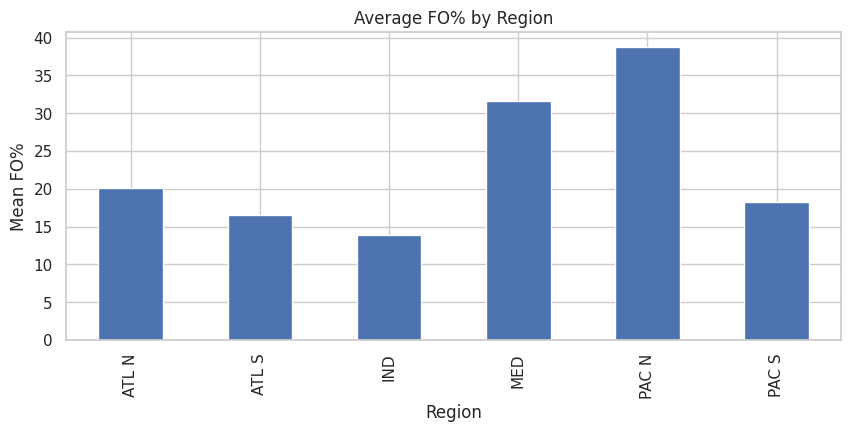

In [ ]:
# Convert 'FO (%) ' to numeric, coercing errors, to ensure proper mean calculation
df['FO (%) '] = pd.to_numeric(df['FO (%) '], errors='coerce')

region_fo = df.groupby("Region")["FO (%) "].mean()
region_fo.plot(kind="bar", figsize=(10,4), title="Average FO% by Region")
plt.ylabel("Mean FO%")
plt.show()

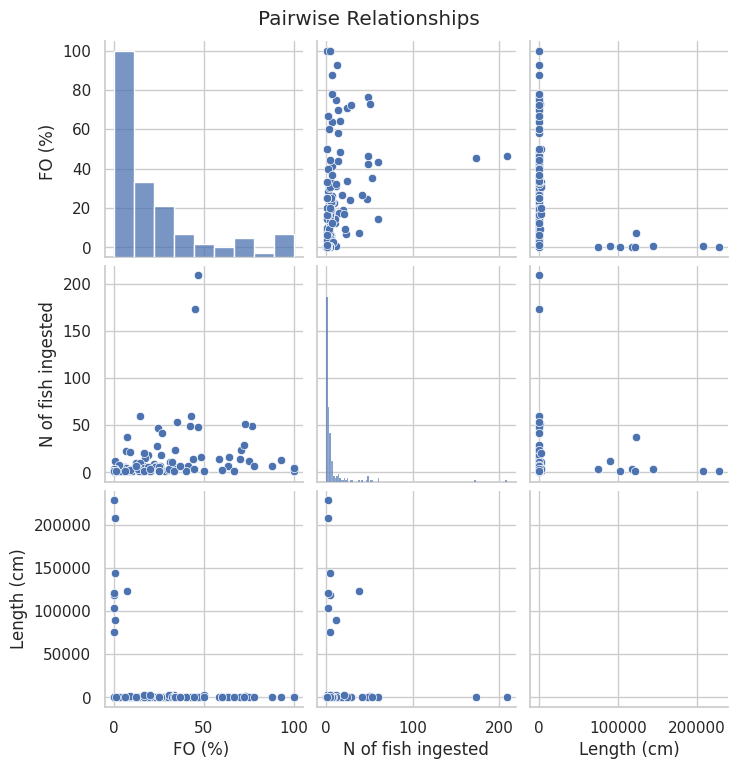

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df[["Trophic level","FO (%) ","N of fish ingested","Length (cm)"]].dropna())
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

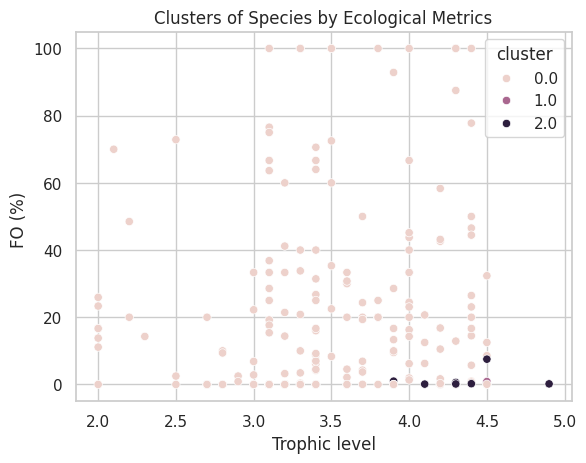

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd # Ensure pandas is imported
import matplotlib.pyplot as plt # Ensure matplotlib is imported
import seaborn as sns # Ensure seaborn is imported

features = ["Trophic level","FO (%) ","N of fish ingested","Length (cm)"]

# Ensure 'Trophic level' is numeric by coercing errors to NaN
df['Trophic level'] = pd.to_numeric(df['Trophic level'], errors='coerce')

X = df[features].dropna()
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto').fit(X) # Added n_init='auto' to suppress future warning
df.loc[X.index, "cluster"] = kmeans.labels_

sns.scatterplot(x="Trophic level", y="FO (%) ", hue="cluster", data=df)
plt.title("Clusters of Species by Ecological Metrics")
plt.show()

In [ ]:
print(df.columns.tolist())

['Order', 'Family', 'Species', 'Common name', 'Habitat', 'Feeding strategy', 'Trophic level', 'IUCN', 'N', 'N of fish ingested', 'FO (%) ', 'PL (N/fish)', 'Plastic type', 'Polymers', 'Plastic size (mm)         < 1, 1-5, > 5', 'Length (cm)', 'Location', 'Region', 'cluster']


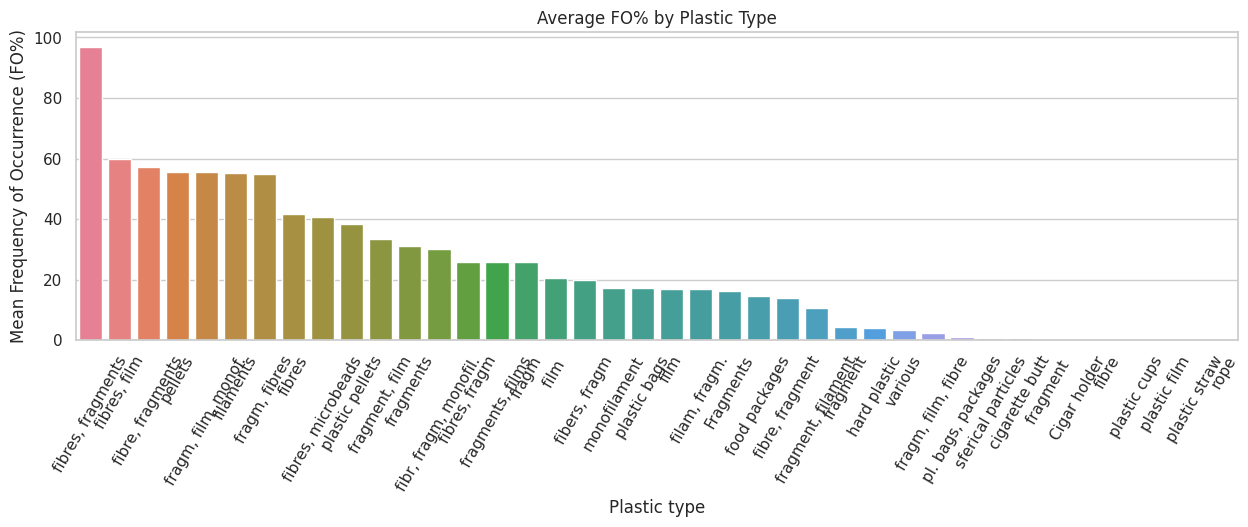

In [ ]:
plt.figure(figsize=(15,4))
mean_fo_by_type = df.groupby('Plastic type')['FO (%) '].mean().sort_values(ascending=False)
plot_data = mean_fo_by_type.reset_index()
sns.barplot(x='Plastic type', y='FO (%) ', data=plot_data,  hue='Plastic type', legend=False)
plt.title("Average FO% by Plastic Type")
plt.xticks(rotation=60)
plt.ylabel("Mean Frequency of Occurrence (FO%)")
plt.show()

/tmp/ipython-input-1514690214.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Plastic type", y="FO (%) ", data=df, palette="viridis")


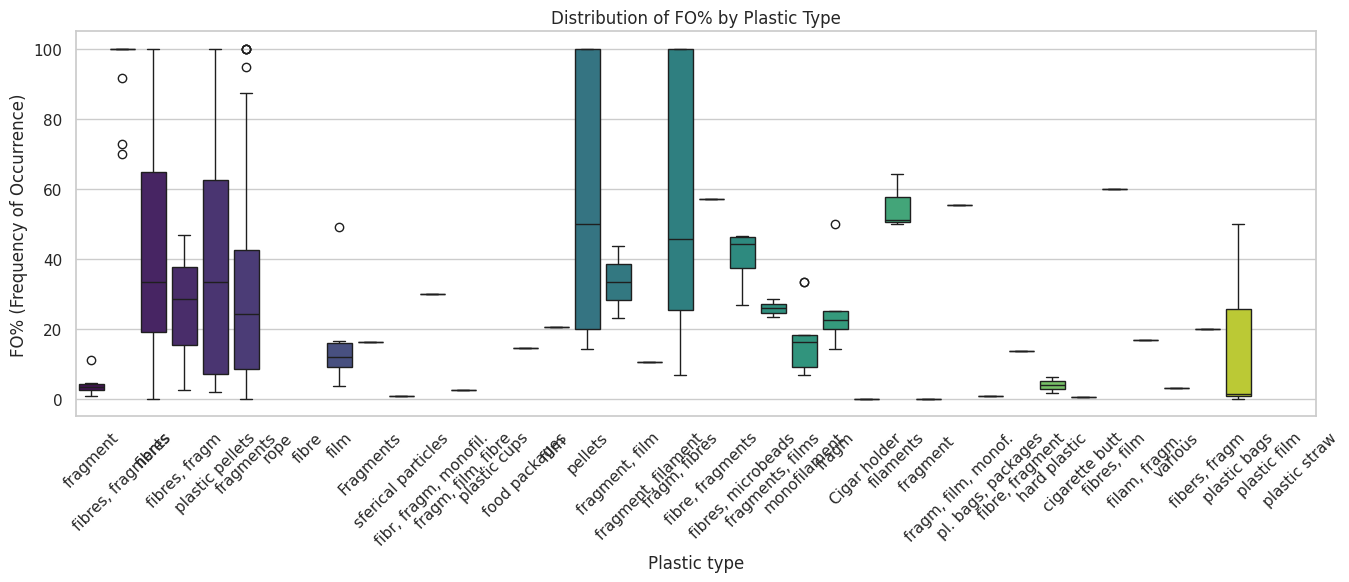

In [ ]:
plt.figure(figsize=(16,5))
sns.boxplot(x="Plastic type", y="FO (%) ", data=df, palette="viridis")
plt.title("Distribution of FO% by Plastic Type")
plt.xticks(rotation=45)
plt.ylabel("FO% (Frequency of Occurrence)")
plt.show()

/tmp/ipython-input-217468153.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=poly_fo.index, y=poly_fo.values, palette="mako")


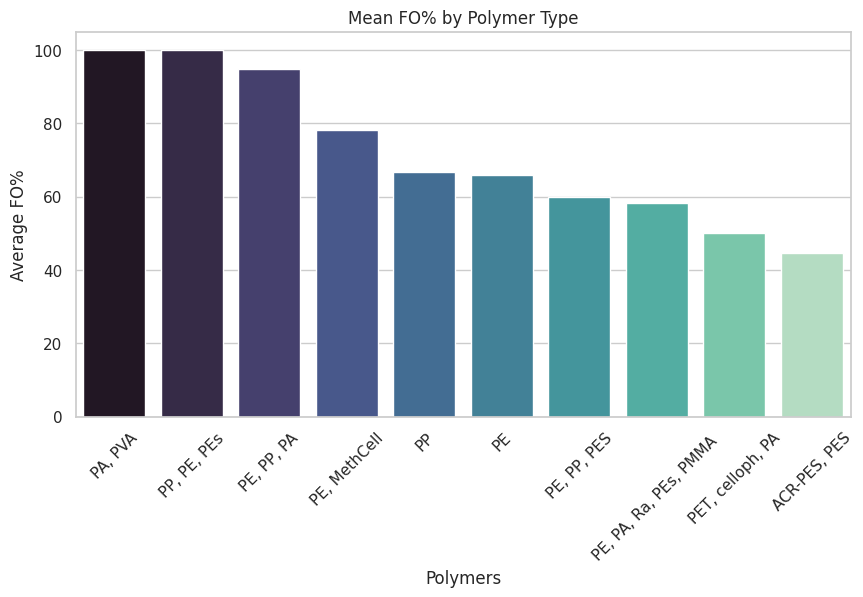

In [ ]:
plt.figure(figsize=(10,5))
poly_fo = df.groupby("Polymers")["FO (%) "].mean().sort_values(ascending=False).head(10)
sns.barplot(x=poly_fo.index, y=poly_fo.values, palette="mako")
plt.title("Mean FO% by Polymer Type")
plt.xticks(rotation=45)
plt.ylabel("Average FO%")
plt.show()


/tmp/ipython-input-2159129251.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=size_fo.index, y=size_fo.values, palette="crest")


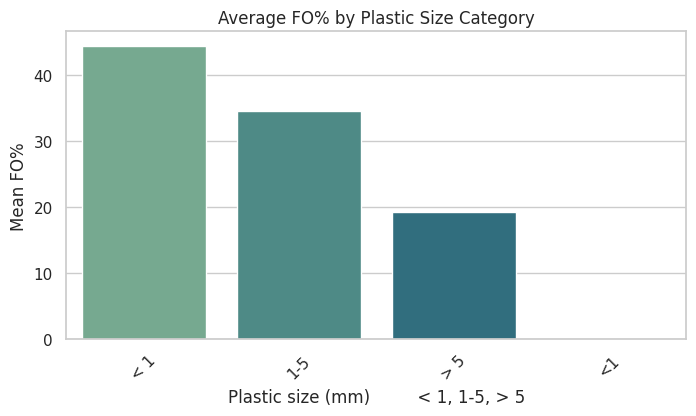

In [ ]:
plt.figure(figsize=(8,4))
size_fo = df.groupby("Plastic size (mm)         < 1, 1-5, > 5")['FO (%) '].mean().sort_values(ascending=False)
sns.barplot(x=size_fo.index, y=size_fo.values, palette="crest")
plt.title("Average FO% by Plastic Size Category")
plt.ylabel("Mean FO%")
plt.xticks(rotation=45)
plt.show()

**Model Training**


In [ ]:
import pandas as pd

X = df[['Habitat', 'Feeding strategy', 'Trophic level', 'Plastic type', 'Polymers', 'Plastic size (mm)         < 1, 1-5, > 5']]  # Independent variables
y = df['FO (%) ']

# Display the first few rows
print("Independent Variables (X):")
print(X.head())

print("\nDependent Variable (y):")
print(y.head())

Independent Variables (X):
   Habitat  Feeding strategy  Trophic level  Plastic type  Polymers  \
0       16                 9             28            30        31   
1        3                 8             16            22         8   
2       10                 1             23            30        31   
3       16                 9             28            30        31   
4        3                 1             22            30        31   

   Plastic size (mm)         < 1, 1-5, > 5  
0                                        4  
1                                        2  
2                                        4  
3                                        4  
4                                        4  

Dependent Variable (y):
0    215
1    215
2      1
3      0
4      0
Name: FO (%) , dtype: int64


Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

        High       0.20      0.18      0.19        11
         Low       0.94      0.94      0.94        53
      Medium       0.50      0.53      0.51        19

    accuracy                           0.75        83
   macro avg       0.55      0.55      0.55        83
weighted avg       0.74      0.75      0.75        83



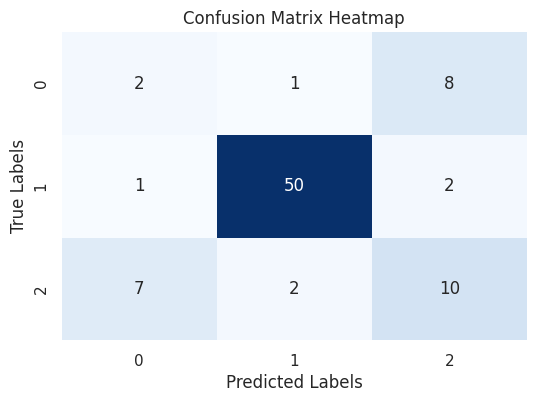


Feature Importance:
                                      Feature  Importance
3                                Plastic type    0.371233
34  Plastic size (mm)         < 1, 1-5, > 5_4    0.129627
2                               Trophic level    0.097647
0                                     Habitat    0.067680
29                                Polymers_31    0.065762
31  Plastic size (mm)         < 1, 1-5, > 5_0    0.059814
1                            Feeding strategy    0.046610
32  Plastic size (mm)         < 1, 1-5, > 5_1    0.033941
33  Plastic size (mm)         < 1, 1-5, > 5_3    0.027130
26                                Polymers_28    0.013987
24                                Polymers_26    0.011258
30                                Polymers_32    0.009694
15                                Polymers_13    0.008881
8                                  Polymers_5    0.008850
18                                Polymers_18    0.006388
22                                Polymers_22    0.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Convert 'FO (%) ' to numeric
df['FO (%) '] = pd.to_numeric(df['FO (%) '], errors='coerce')

bins = [0, 33, 66, 100]  # Low, Medium, High thresholds for FO (%)
labels = ['Low', 'Medium', 'High']
df['FO_category'] = pd.cut(df['FO (%) '], bins=bins, labels=labels, right=False)


X = df[['Habitat', 'Feeding strategy', 'Trophic level', 'Plastic type', 'Polymers', 'Plastic size (mm)         < 1, 1-5, > 5']]
y = df['FO_category']


combined = pd.concat([X, y], axis=1).dropna()
X = combined[['Habitat', 'Feeding strategy', 'Trophic level', 'Plastic type', 'Polymers', 'Plastic size (mm)         < 1, 1-5, > 5']]
y = combined['FO_category']

X = pd.get_dummies(X, columns=['Polymers', 'Plastic size (mm)         < 1, 1-5, > 5'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

feature_importance = model.feature_importances_

# Create a DataFrame to display the importance of each feature
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

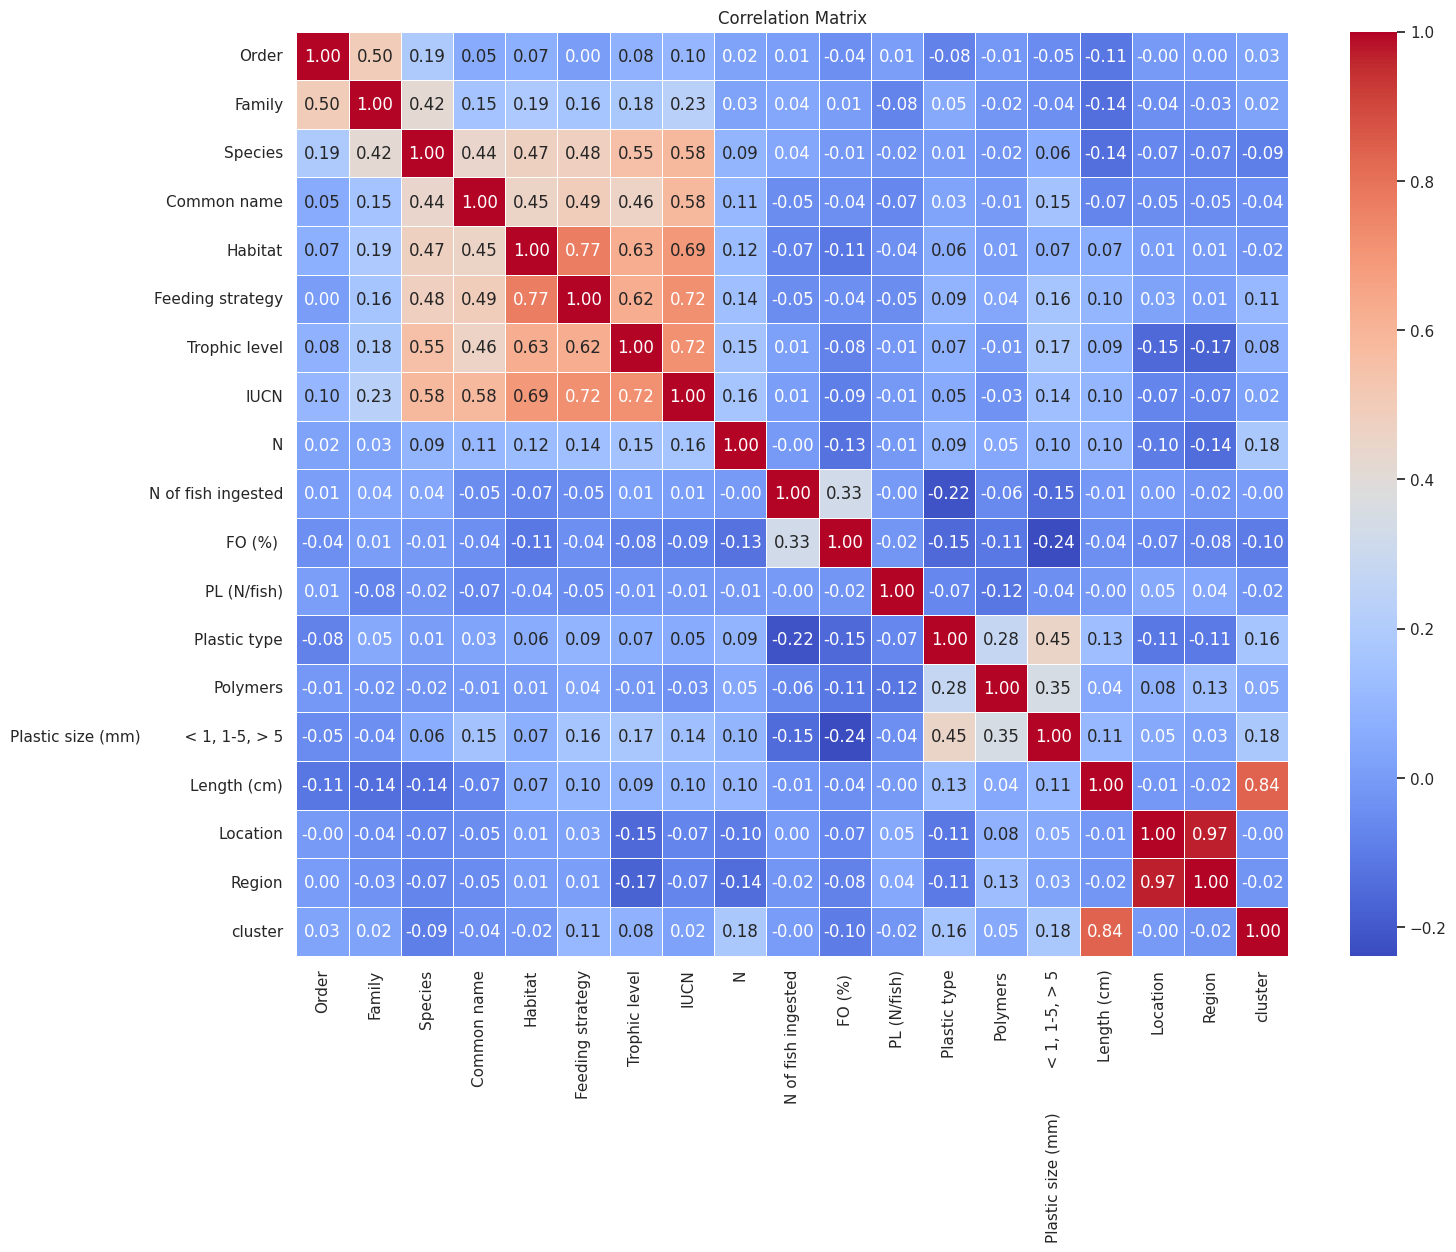

In [ ]:
# Select only numeric columns for correlation analysis
numeric_dataset = df.select_dtypes(include=np.number)

correlation_matrix = numeric_dataset.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

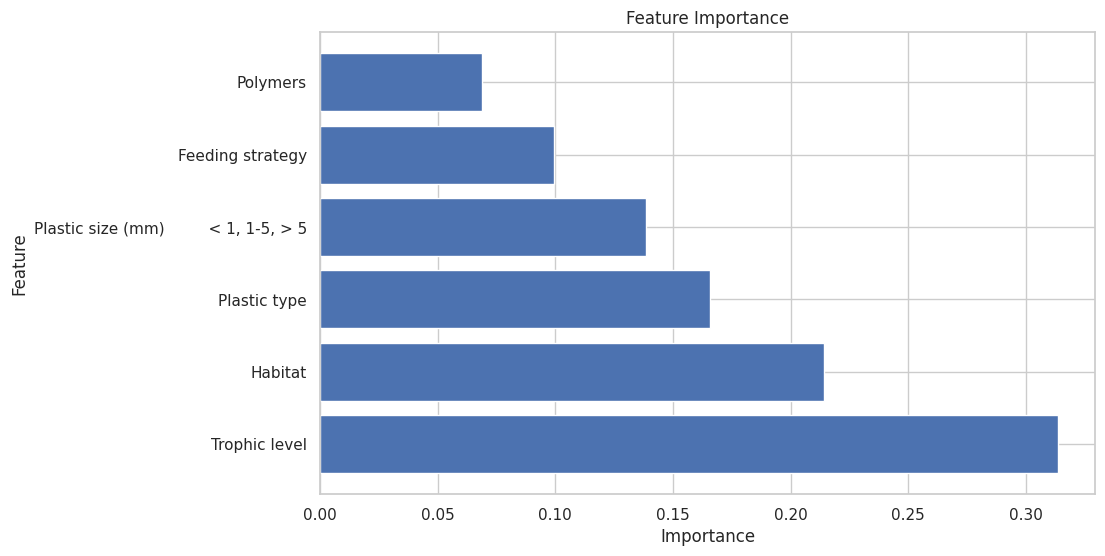

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X = df[['Habitat', 'Feeding strategy', 'Trophic level', 'Plastic type', 'Polymers', 'Plastic size (mm)         < 1, 1-5, > 5']]  # Independent variables
y = df['FO (%) ']


combined = pd.concat([X, y], axis=1).dropna()
X = combined[['Habitat', 'Feeding strategy', 'Trophic level', 'Plastic type', 'Polymers', 'Plastic size (mm)         < 1, 1-5, > 5']]
y = combined['FO (%) ']


# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

importances = model.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), [X.columns[i] for i in indices])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

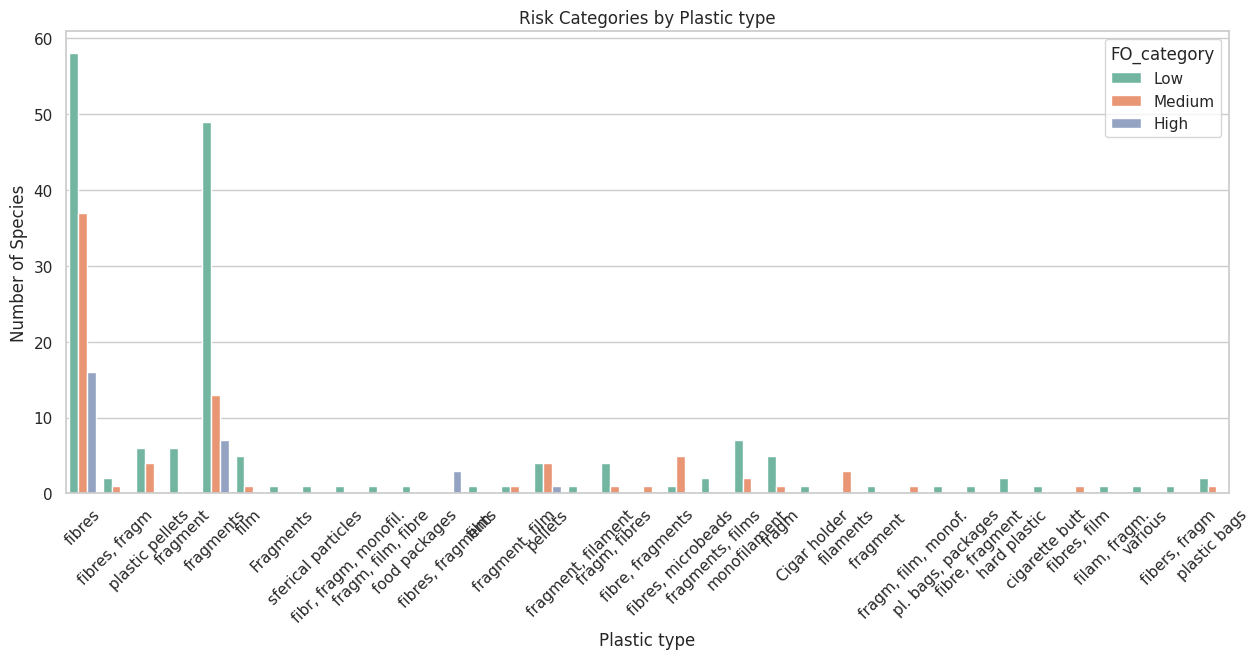

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'FO (%) ' is numeric (handling potential string values and NaNs)
# This code is adapted from earlier cleaning steps in the notebook.
if 'FO (%) ' in df.columns:
    df['FO (%) '] = df['FO (%) '].astype(str).str.replace('[^0-9.]', '', regex=True)
    df['FO (%) '] = pd.to_numeric(df['FO (%) '], errors='coerce')

    # Categorize 'FO (%)' into Low, Medium, High (adapted from F9b8VDpZiKfu)
    bins = [0, 33, 66, 100]  # Low, Medium, High thresholds for FO (%)
    labels = ['Low', 'Medium', 'High']
    df['FO_category'] = pd.cut(df['FO (%) '], bins=bins, labels=labels, right=False)
else:
    print("Error: 'FO (%) ' column not found in DataFrame. Cannot create 'FO_category'.")
    # Exit or handle the missing column gracefully if it's critical

# Filter out rows where FO_category is NaN, as these cannot be plotted with hue
df_plot = df.dropna(subset=['FO_category'])

# Count the number of species in each Risk Category for each Plastic type
plt.figure(figsize=(15, 6))
sns.countplot(x='Plastic type', hue='FO_category', data=df_plot, palette='Set2')
plt.title('Risk Categories by Plastic type')
plt.xlabel('Plastic type')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.show()

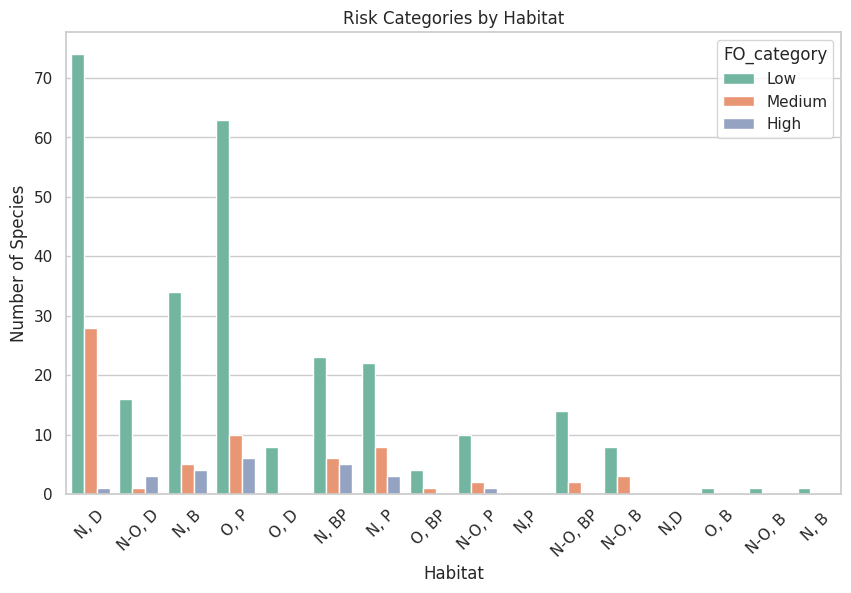

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of species in each Risk Category for each Habitat
plt.figure(figsize=(10, 6))
sns.countplot(x='Habitat', hue='FO_category', data=df, palette='Set2')
plt.title('Risk Categories by Habitat')
plt.xlabel('Habitat')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.show()


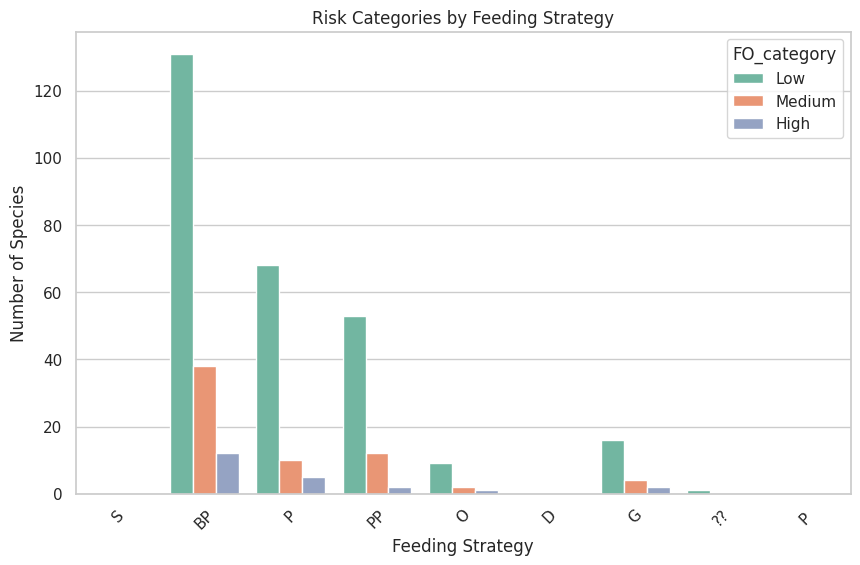

In [ ]:
# Count the number of species in each Risk Category for each Feeding Strategy
plt.figure(figsize=(10, 6))
sns.countplot(x='Feeding strategy', hue='FO_category', data=df, palette='Set2')
plt.title('Risk Categories by Feeding Strategy')
plt.xlabel('Feeding Strategy')
plt.ylabel('Number of Species')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-939848273.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FO_category', data=df, palette='Set2')


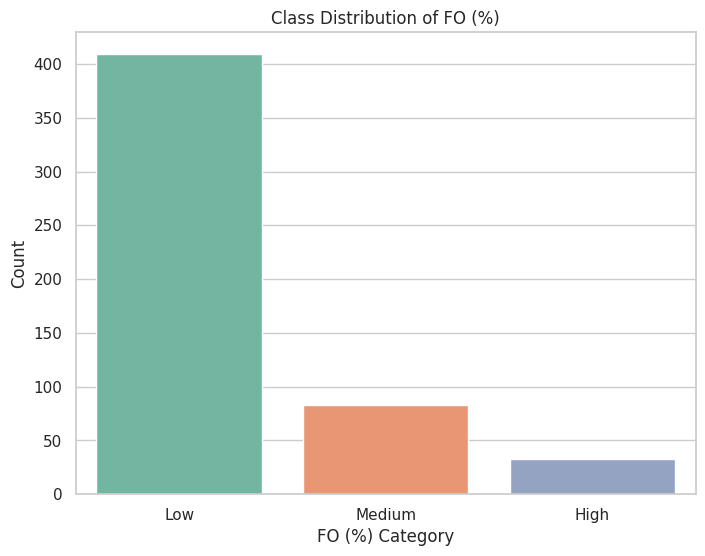

In [ ]:
# Plotting the class distribution of FO (%)
plt.figure(figsize=(8, 6))
sns.countplot(x='FO_category', data=df, palette='Set2')
plt.title('Class Distribution of FO (%)')
plt.xlabel('FO (%) Category')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-2440631058.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Plastic type', y='FO (%) ', data=df, palette='Set2')


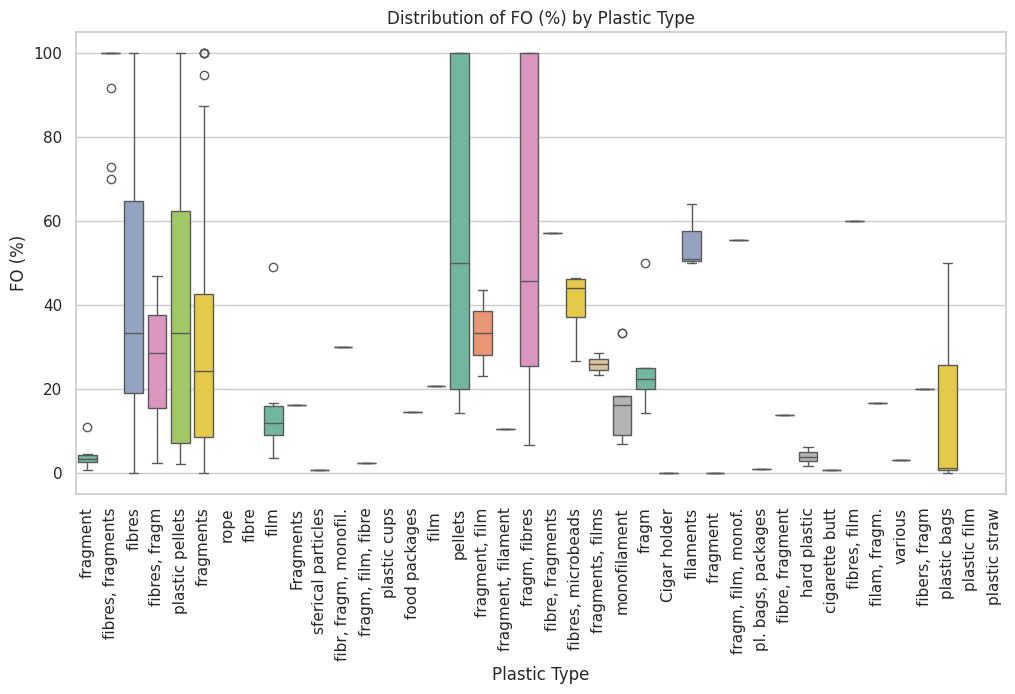

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to show FO (%) distribution by Plastic Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Plastic type', y='FO (%) ', data=df, palette='Set2')
plt.title('Distribution of FO (%) by Plastic Type')
plt.xlabel('Plastic Type')
plt.ylabel('FO (%)')
plt.xticks(rotation=90)
plt.show()

/tmp/ipython-input-119012082.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Plastic type', y='FO (%) ', data=avg_fo_by_plastic, palette='Set2')


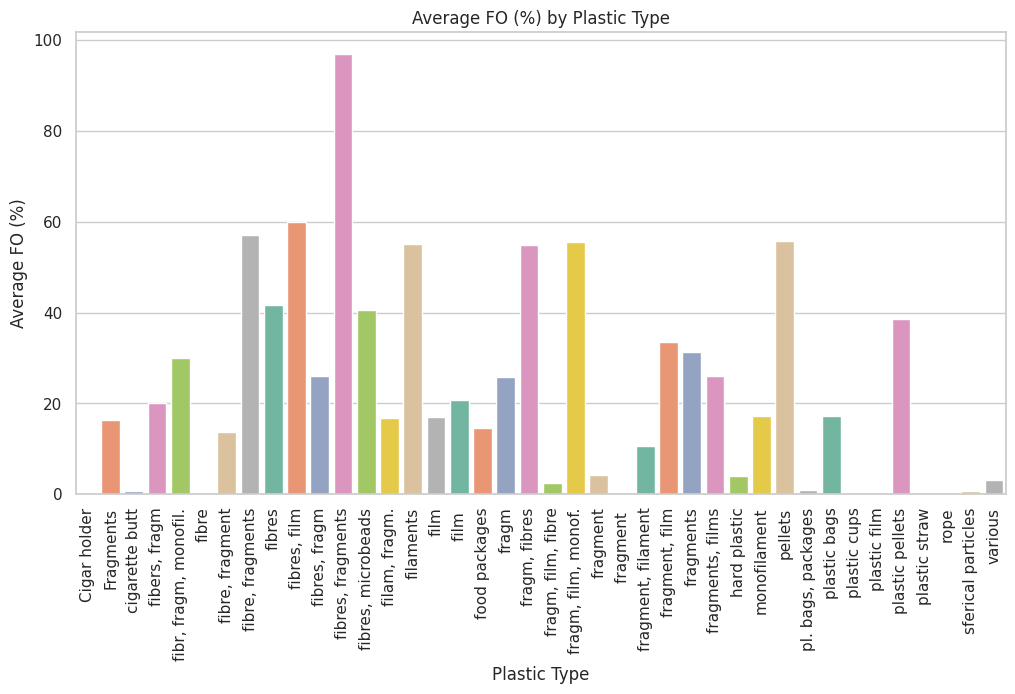

In [ ]:
# Calculate the average FO (%) for each Plastic Type
avg_fo_by_plastic = df.groupby('Plastic type')['FO (%) '].mean().reset_index()

# Bar plot for the average FO (%) by Plastic Type
plt.figure(figsize=(12, 6))
sns.barplot(x='Plastic type', y='FO (%) ', data=avg_fo_by_plastic, palette='Set2')
plt.title('Average FO (%) by Plastic Type')
plt.xlabel('Plastic Type')
plt.ylabel('Average FO (%)')
plt.xticks(rotation=90)
plt.show()

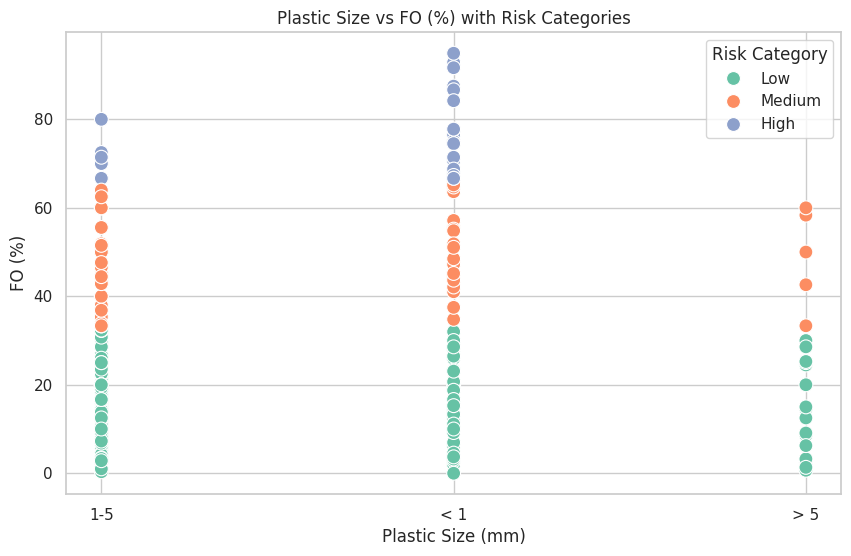

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a scatter plot for Plastic Size vs FO (%)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Plastic size (mm)         < 1, 1-5, > 5', y='FO (%) ', data=df, hue='FO_category', palette='Set2', s=100)

plt.title('Plastic Size vs FO (%) with Risk Categories')
plt.xlabel('Plastic Size (mm)')
plt.ylabel('FO (%)')
plt.legend(title='Risk Category')
plt.grid(True)

plt.show()

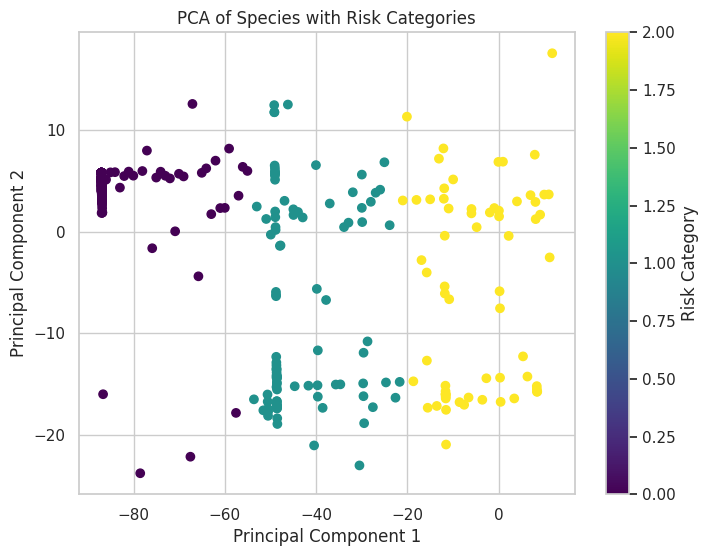

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Select the numerical columns for PCA directly from the dataset
pca_data = df[['FO (%) ', 'Trophic level', 'Plastic type']]  # Select relevant numerical columns

# Drop rows with NaN values in the selected columns for PCA
pca_data = pca_data.dropna()

# Perform PCA on the selected numerical features
pca = PCA(n_components=2)
pca_components = pca.fit_transform(pca_data)

# Visualize the PCA components
plt.figure(figsize=(8, 6))
# Map Risk_Category to numerical values for coloring the scatter plot
risk_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
colors = df['FO_category'].map(risk_mapping)

# Ensure the colors DataFrame has the same index as pca_data after dropping NaNs
colors = colors[pca_data.index]


plt.scatter(pca_components[:, 0], pca_components[:, 1], c=colors, cmap='viridis')
plt.title('PCA of Species with Risk Categories')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Risk Category')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)

# Fit the model to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters: ", grid_search.best_params_)


Best Parameters:  {'max_depth': 5, 'n_estimators': 150}


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Best parameters found:  {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 150}
Accuracy: 0.75


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.75


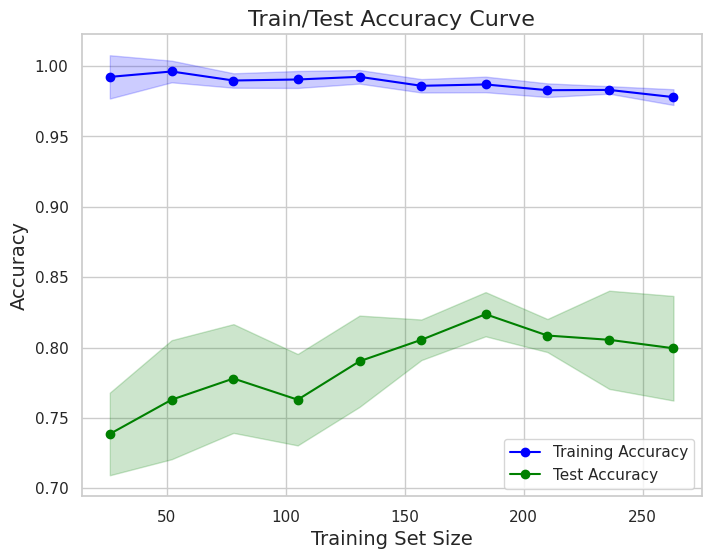

In [ ]:
from sklearn.model_selection import learning_curve

# Convert y_train categories to numerical representations
# This is necessary because learning_curve internally attempts to convert y to a float array,
# which fails with string categories like 'Medium'.
y_train_numeric = y_train.cat.codes

# Generate learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train_numeric, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation for the training and testing sets
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", marker="o")
plt.plot(train_sizes, test_mean, label="Test Accuracy", color="green", marker="o")

# Plot the standard deviation as a shaded area
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

# Titles and labels
plt.title("Train/Test Accuracy Curve", fontsize=16)
plt.xlabel("Training Set Size", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd

# Assuming 'df' is your DataFrame

# Convert 'FO (%) ' to numeric
df['FO (%) '] = pd.to_numeric(df['FO (%) '], errors='coerce')

# Categorize 'FO (%)' into Low, Medium, High
bins = [0, 33, 66, 100]  # Low, Medium, High thresholds for FO (%)
labels = ['Low', 'Medium', 'High']
df['FO_category'] = pd.cut(df['FO (%) '], bins=bins, labels=labels, right=False)

# Select features (X) and target (y)
X = df[['Habitat', 'Feeding strategy', 'Trophic level', 'Plastic type', 'Polymers', 'Plastic size (mm)         < 1, 1-5, > 5']]
y = df['FO_category']

# Drop rows with missing values
combined = pd.concat([X, y], axis=1).dropna()
X = combined[['Habitat', 'Feeding strategy', 'Trophic level', 'Plastic type', 'Polymers', 'Plastic size (mm)         < 1, 1-5, > 5']]
y = combined['FO_category']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['Polymers', 'Plastic size (mm)         < 1, 1-5, > 5'])

# Initialize RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Apply K-fold cross-validation (e.g., 5 folds)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the accuracy for each fold
print(f"Accuracy for each fold: {cv_scores}")

# Calculate and print the mean and standard deviation of cross-validation scores
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Accuracy for each fold: [0.79518072 0.73493976 0.87804878 0.7804878  0.86585366]
Mean Accuracy: 0.8109
Standard Deviation: 0.0538


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming 'df' is your DataFrame

# Convert 'FO (%) ' to numeric
df['FO (%) '] = pd.to_numeric(df['FO (%) '], errors='coerce')

# Categorize 'FO (%)' into Low, Medium, High
bins = [0, 33, 66, 100]  # Low, Medium, High thresholds for FO (%)
labels = ['Low', 'Medium', 'High']
df['FO_category'] = pd.cut(df['FO (%) '], bins=bins, labels=labels, right=False)

# Select features (X) and target (y)
X = df[['Habitat', 'Feeding strategy', 'Trophic level', 'Plastic type', 'Polymers', 'Plastic size (mm)         < 1, 1-5, > 5']]
y = df['FO_category']

# Drop rows with missing values
combined = pd.concat([X, y], axis=1).dropna()
X = combined[['Habitat', 'Feeding strategy', 'Trophic level', 'Plastic type', 'Polymers', 'Plastic size (mm)         < 1, 1-5, > 5']]
y = combined['FO_category']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['Polymers', 'Plastic size (mm)         < 1, 1-5, > 5'])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the resampled (balanced) training data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

        High       0.27      0.27      0.27        11
         Low       0.98      0.94      0.96        53
      Medium       0.52      0.58      0.55        19

    accuracy                           0.77        83
   macro avg       0.59      0.60      0.59        83
weighted avg       0.78      0.77      0.78        83

